# XGBOOST

## Importation des bibliotheques et du dataset


In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

## Division des données

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modele.

D'abord assigner toutes les valeurs sauf Heart diseases dans x et Heart diseases dans y.

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

### Sous-partie : Verification des types

Dans le cas du XGBoost, il est necessaire de convertir les variables categorielles en variables numeriques afin de pouvoir les utiliser dans le modele. Dans notre cas, lors du nettoyage de notre dataset, nous avons converti les variables categorielles en variables numeriques. Nous n'avons donc pas besoin de le faire ici.

In [15]:
X.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
TA_ChestPain           int64
ATA_ChestPain          int64
NAP_ChestPain          int64
ASY_ChestPain          int64
Normal_RestingECG      int64
ST_RestingECG          int64
LVH_RestingECG         int64
Up_ST_Slope            int64
Flat_ST_Slope          int64
Down_ST_Slope          int64
dtype: object

## Division des données (Suite)

Puis je vais diviser mes données de la manière suivante : 

80% pour l'entrainement et 20% pour le test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


On va ensuite importer la librairie XGBoost et creer un modele XGBoost.

On utilise "xgb.DMatrix" pour convertir les données en un format utilisable et optimisé par XGBoost.

In [17]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)


# XGBoost Regression

## Entrainement du modele

On va ensuite passé à l'entrainement de notre modele. On utilise "xgb.train" pour entrainer notre modele avec des parametres specifiques.

les parametres correspondent à : 

param : les parametres du modele
"objective" : "reg:squarederror" pour une regression
"tree_method": "hist" qui est une methode d'entrainement plus rapide
n : le nombre d'iterations


In [18]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n)



In [19]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)


On va ensuite calculer l'erreur quadratique moyenne pour evaluer notre modele. Plus il est bas plus notre modele est bon.

In [20]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE: {rmse:.3f}")


RMSE: 0.344


On rajoute ensuite le parametre "eval_metric : logloss" qui est une metrique permettant une meilleure resolution des problemes de classification binaire. Il mesure l'erreur entre les probabilités prédites et les valeurs reelles.

En gros il ameliore la precision de notre modele et penalise les erreurs de classification.

In [21]:
params = {"objective": "binary:logistic", "tree_method": "hist", "eval_metric": "logloss"}
n = 100
evals = [(dtrain_reg, "train"), (dtest_reg, "test")]
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n, evals=evals)


[0]	train-logloss:0.52785	test-logloss:0.55410


[1]	train-logloss:0.43180	test-logloss:0.47731
[2]	train-logloss:0.36709	test-logloss:0.42603
[3]	train-logloss:0.32072	test-logloss:0.39428
[4]	train-logloss:0.28087	test-logloss:0.37323
[5]	train-logloss:0.25258	test-logloss:0.35497
[6]	train-logloss:0.22769	test-logloss:0.33700
[7]	train-logloss:0.20708	test-logloss:0.32859
[8]	train-logloss:0.19094	test-logloss:0.32649
[9]	train-logloss:0.17758	test-logloss:0.31876
[10]	train-logloss:0.16452	test-logloss:0.31715
[11]	train-logloss:0.15201	test-logloss:0.31259
[12]	train-logloss:0.14088	test-logloss:0.31643
[13]	train-logloss:0.13295	test-logloss:0.30930
[14]	train-logloss:0.12606	test-logloss:0.30419
[15]	train-logloss:0.11957	test-logloss:0.30801
[16]	train-logloss:0.11438	test-logloss:0.30991
[17]	train-logloss:0.10877	test-logloss:0.30770
[18]	train-logloss:0.10448	test-logloss:0.30756
[19]	train-logloss:0.09708	test-logloss:0.30411
[20]	train-logloss:0.09187	test-logloss:0.30021
[21]	train-logloss:0.08683	test-logloss:0.30647
[

## Prediction finale

On va ensuite faire une prediction sur notre ensemble de test et afficher les resultats, donc l'exactitude et la precision de notre modele et ressortir une matrice de confusion.

Métriques de performance :
Accuracy: 0.8533
F1-score: 0.8767

Matrice de confusion :
[[61 11]
 [16 96]]

Rapport de classification détaillé :


              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.90      0.86      0.88       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



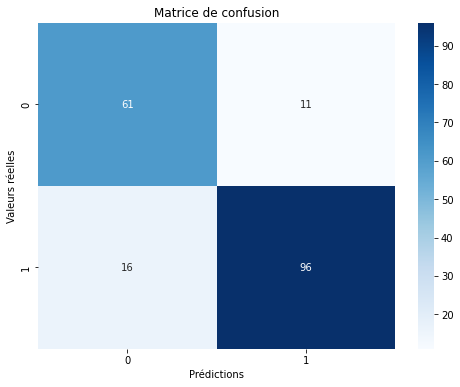

In [22]:
# Faire des prédictions
y_pred = model.predict(dtest_reg)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes binaires

# Calculer les métriques de performance
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Accuracy et F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Afficher les résultats
print("Métriques de performance :")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nMatrice de confusion :")
print(conf_matrix)
print("\nRapport de classification détaillé :")
print(classification_report(y_test, y_pred_binary))

# Visualisation de la matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.show()

# Test 

### Fonction de test

On va ensuite utiliser des fonction de test afin de "tester" notre modele. Les fonctions sont les suivantes :

In [23]:
def tester_patient(Liste_donnees):
    df = pd.DataFrame(Liste_donnees, columns=X.columns)
    dtest = xgb.DMatrix(df)
    prediction_proba = model.predict(dtest)
    prediction = (prediction_proba > 0.5).astype(int)

    print(f"Probabilité de maladie cardiaque : {prediction_proba[0]:.4f}")
    print(f"Prédiction : {'Malade' if prediction[0] == 1 else 'Non Malade'}")
    
    return prediction_proba[0], prediction[0]
    
def tester_plusieurs_patient(Liste):
    for p in Liste:
        tester_patient(p)
        print("\n")

### Tests Unitaires

On va ensuite tester notre modele avec des tests unitaires. On va tester la fonction de test avec des valeurs connues et verifier si les resultats sont corrects.

In [24]:

patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #0
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911
patient5 = [[49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0]] #1

liste_patients = [patient, patient2, patient3, patient4, patient5]
tester_plusieurs_patient(liste_patients)



Probabilité de maladie cardiaque : 0.0012
Prédiction : Non Malade


Probabilité de maladie cardiaque : 0.9574
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9771
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9994
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9075
Prédiction : Malade


